In [3]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt   
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import train_test_split


In [4]:
df=pd.read_csv('car-mpg.csv')

In [5]:
df1=df.copy()

In [6]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# ●	Do Exploratory Data Analysis of the data and state your insights.

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin      398 non-null int64
car_name    398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
df1.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [11]:
#drop unnecessary row
df1.drop(columns={'car_name'},inplace=True)

In [12]:
df1['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [17]:
df1=pd.get_dummies(df1,drop_first=True,columns=['origin'])

In [18]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [19]:
#checking outliers in target

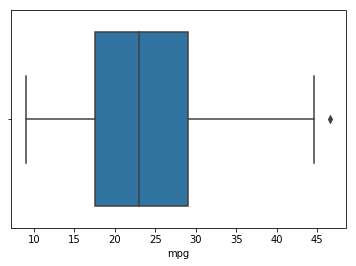

In [20]:
sns.boxplot(df1['mpg'])

In [21]:
#almost no outlier

# ●	Perform All the various feature selection techniques

# 1 Pearson relation

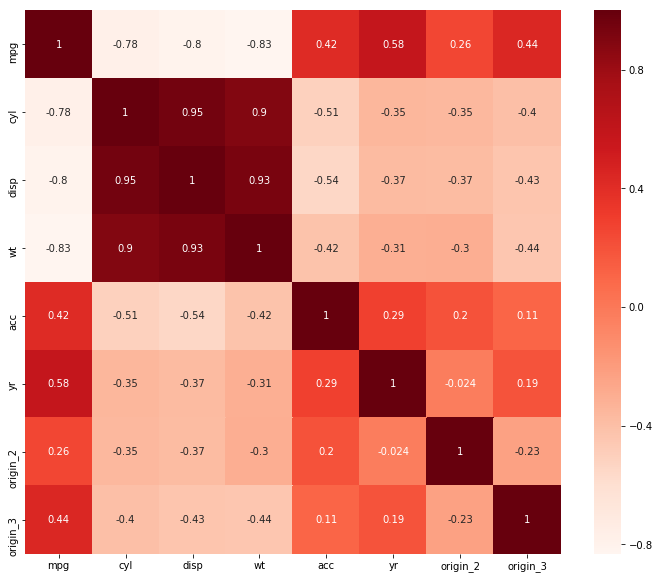

In [23]:
plt.figure(figsize=(12,10))
cor=df1.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

In [24]:
#Correlation with o/p variables
cor_target=abs(cor['mpg'])
#selecting highly correlated features
select_features=cor_target[cor_target>0.5]
select_features


mpg     1.000000
cyl     0.775396
disp    0.804203
wt      0.831741
yr      0.579267
Name: mpg, dtype: float64

In [26]:
X=df1[["cyl","disp","wt","yr"]]
y=df1['mpg']

In [27]:
X_constant=sm.add_constant(X)
model=sm.OLS(y,X_constant).fit()
model.summary()

/opt/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     413.9
Date:                Mon, 09 Dec 2019   Prob (F-statistic):          1.97e-139
Time:                        00:43:49   Log-Likelihood:                -1054.0
No. Observations:                 398   AIC:                             2118.
Df Residuals:                     393   BIC:                             2138.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.7070      4.052     -3.383      0.001     -21.673      -5.741
cyl           -0.2516      0.329     -0.766      0.444      -0.898       0.394
disp           0.0047      0.007      0.707      0.480      -0.008       0.018
wt            -0.0068      0.001    -11.811      0.000      -0.008      -0.006
yr             0.7595      0.051     15.007      0.000       0.660       0.859
==============================================================================
Omnibus:                       42.235   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.410
Skew:                           0.665   Prob(JB):                     5.14e-16
Kurtosis:                       4.573   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
lin_reg=LinearRegression()
model_1=lin_reg.fit(X_train,Y_train)
print('R^2 for train:',lin_reg.score(X_train,Y_train))
print('R^2 for test:',lin_reg.score(X_test,Y_test))
#Mse 1


(278, 4)
(120, 4)
(278,)
(120,)
('R^2 for train:', 0.7990577453895599)
('R^2 for test:', 0.8276864311936623)


# 2.Wrapper method¶

# 2.1. Backward elimination


In [30]:
df1.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,0


In [36]:
X=df1.drop(columns={'mpg'})
y=df1['mpg']

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
origin_2    398 non-null uint8
origin_3    398 non-null uint8
dtypes: float64(2), int64(3), object(1), uint8(2)
memory usage: 19.5+ KB


In [40]:
y.info()

AttributeError: 'Series' object has no attribute 'info'

In [32]:
X_1=sm.add_constant(X)
#fitting the SMS.model
model=sm.OLS(y,X_1).fit()
model.pvalues

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).